In [72]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [73]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [74]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [75]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [76]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Begin5 START OF MODULE FIVE #########################
#
# There are 3 files in Module 5 with 62 students.Module has attendance, quizzes.
# 33 students passed this module with 30 students failing.
# There are 6 assignments, attendance, quizzes and MCQ test in module 5.
#

In [77]:
# Data Preperation Module 5
# 2 files in Module5
# Module 5

module5ml = pd.read_csv('Module5_Moodle_Logs.csv')

In [78]:
module5mg = pd.read_csv('Module5_Moodle_Grades.csv')

In [79]:
print (module5mg.columns.tolist())
# Full list of Columns for module 5

['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Assignment 1 image of poster (Real)', 'Assignment: Assignment 1  S  (Real)', 'Assignment: Assignment 1 T (Real)', 'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)', 'Assignment:   Task 1 (Real)', 'Assignment:   Task 2 (Real)', 'Assignment:   Task 3 (Real)', 'Assignment: Lab 1 S(Real)', 'Assignment: Pre-submission meeting (Real)', 'Assignment: Repeat assignment grading (Real)', 'Assignment: Submit repeat exam (Real)', 'Assignment: Upload Headshot (Real)', 'Assignment: v upload (Real)', 'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)', 'Attendance: Attendance (Real)', 'MCQ Test total (Real)', 'Quiz: MCQ 2018 (Real)']


In [80]:
# Print the number of unique values in each modul5ml column
print(module5ml.nunique())

Time              5156
User full name      63
Affected user        1
Event context       82
Component           14
Event name          32
Description         73
Origin               2
IP address           1
dtype: int64


In [81]:
# Print the number of unique values in each modul5mg column
print(module5mg.nunique())

First name                                         63
Surname                                            63
ID number                                          63
Email address                                      63
Course total (Real)                                62
Last downloaded from this course                    2
Assignment: Assignment 1 image of poster (Real)     1
Assignment: Assignment 1  S  (Real)                 1
Assignment: Assignment 1 T (Real)                  13
Assignment: Assignment 2 - Submit (Real)           28
Assignment: FG (Real)                               2
Assignment:   Task 1 (Real)                         1
Assignment:   Task 2 (Real)                         1
Assignment:   Task 3 (Real)                         1
Assignment: Lab 1 S(Real)                           1
Assignment: Pre-submission meeting (Real)           2
Assignment: Repeat assignment grading (Real)        1
Assignment: Submit repeat exam (Real)               1
Assignment: Upload Headshot 

In [82]:
# time5
time5 = module5ml["Time"].str.split(",", n = 1, expand = True)

In [83]:
# making separate Date column from new data frame 
module5ml["Date"]= time5[0] 

# making seperate Time column from new data frame
module5ml['Time']= time5[1]


In [84]:
# Convert the date column to datetime64
module5ml.Date = pd.to_datetime(module5ml.Date)

In [85]:
len(module5ml)

14049

In [86]:
#Remove activity outside semester start and end dates range -Timeedit5
mask5 = (module5ml['Date'] >= StartDate) & (module5ml['Date'] <= EndDate)

module5ml = module5ml.loc[mask5]

len(module5ml)

9016

In [87]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_5 = (module5ml['Date'] >= StartDate) & (module5ml['Date'] <= TriOne)

FirstFive5 = module5ml.loc[week5_5]

len(FirstFive5)


2284

In [88]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_5 = (module5ml['Date'] >= TriOne) & (module5ml['Date'] <= TriTwo)

FirstTen5 = module5ml.loc[week10_5]

len(FirstTen5)


5333

In [89]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_5 = (module5ml['Date'] >= TriTwo) & (module5ml['Date'] <= EndDate)

FirstFivt5 = module5ml.loc[week15_5]

len(FirstFivt5)


1529

In [90]:
module5ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
dtype: object

In [91]:
#Splituser5
# new data frame with split value columns 
new5 = module5ml["User full name"].str.split(" ", n = 1, expand = True)


In [92]:
# making separate first name column from new data frame 
module5ml["First name"]= new5[0] 

# making separate last name column from new data frame 
module5ml["Last name"]= new5[1] 


In [93]:
module5ml.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address,Date,First name,Last name
3,14:26,aI1T bxjW,-,Assignment: Assignment 1 T,Assignment,The status of the submission has been viewed.,The user with id '0' has viewed the submission...,web,127.0.0.1,2019-01-03,aI1T,bxjW
4,14:26,aI1T bxjW,-,Course: Module 5,System,Course user report viewed,The user with id '0' viewed the user report fo...,web,127.0.0.1,2019-01-03,aI1T,bxjW


In [94]:
#m5ml_subset
m5ml_subset = module5ml.drop(module5ml[['IP address','Origin','Description','Affected user']], axis=1)

In [95]:
#onehot5
module5ml_onehot = m5ml_subset.copy()
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Event name'], prefix = ['Event name'])
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Event context'], prefix = ['Event context'])
module5ml_onehot = pd.get_dummies(module5ml_onehot, columns=['Component'], prefix = ['Component'])


print(module5ml_onehot.head())


      Time User full name       Date First name Last name  \
3    14:26      aI1T bxjW 2019-01-03       aI1T      bxjW   
4    14:26      aI1T bxjW 2019-01-03       aI1T      bxjW   
5    09:19      aA6B bBfk 2019-01-03       aA6B      bBfk   
6    09:17      aA6B bBfk 2019-01-03       aA6B      bBfk   
52   10:04      a3xG bp9L 2019-01-02       a3xG      bp9L   

    Event name_A file has been uploaded.  \
3                                      0   
4                                      0   
5                                      0   
6                                      0   
52                                     0   

    Event name_A submission has been submitted.  \
3                                             0   
4                                             0   
5                                             0   
6                                             0   
52                                            0   

    Event name_An online text has been uploaded.  \
3        

In [96]:
m5mg = module5mg[['First name', 'Surname', 'ID number', 'Course total (Real)','Assignment: Assignment 1 T (Real)', 'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)', 'Assignment: Pre-submission meeting (Real)', 'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)', 'Attendance: Attendance (Real)', 'MCQ Test total (Real)', 'Quiz: MCQ 2018 (Real)']]

In [97]:
#Engaged = > 55
disengaged5 = m5mg['Course total (Real)'] < 55


In [98]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m5mg['disengaged'] = np.where(m5mg['Course total (Real)']<=55, '1', '0')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
m5mg['disengaged'] = pd.to_numeric(m5mg['disengaged'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
print(m5mg['disengaged'].value_counts(dropna=False))

1    39
0    24
Name: disengaged, dtype: int64


In [101]:
m5mg.dtypes

First name                                    object
Surname                                       object
ID number                                     object
Course total (Real)                          float64
Assignment: Assignment 1 T (Real)              int64
Assignment: Assignment 2 - Submit (Real)     float64
Assignment: FG (Real)                          int64
Assignment: Pre-submission meeting (Real)      int64
Assignment 1 Non-Linear S total (Real)       float64
Assignment 2 V total (Real)                  float64
Attendance: Attendance (Real)                float64
MCQ Test total (Real)                        float64
Quiz: MCQ 2018 (Real)                        float64
disengaged                                     int64
dtype: object

In [102]:
# Print the number of unique values in each modul5mg column
print(m5mg.nunique())

First name                                   63
Surname                                      63
ID number                                    63
Course total (Real)                          62
Assignment: Assignment 1 T (Real)            13
Assignment: Assignment 2 - Submit (Real)     28
Assignment: FG (Real)                         2
Assignment: Pre-submission meeting (Real)     2
Assignment 1 Non-Linear S total (Real)       13
Assignment 2 V total (Real)                  28
Attendance: Attendance (Real)                39
MCQ Test total (Real)                        22
Quiz: MCQ 2018 (Real)                        22
disengaged                                    2
dtype: int64


In [103]:
m5mg.head(2)

,First name,Surname,ID number,Course total (Real),Assignment: Assignment 1 T (Real),Assignment: Assignment 2 - Submit (Real),Assignment: FG (Real),Assignment: Pre-submission meeting (Real),Assignment 1 Non-Linear S total (Real),Assignment 2 V total (Real),Attendance: Attendance (Real),MCQ Test total (Real),Quiz: MCQ 2018 (Real),disengaged
0,a8NM,bDqB,U8NMDqBG,82.78,50,61.43,100,10,17.5,21.5,0.83,0.0,0.00,0
1,aSnR,bGk9,VSnRGk9O,10.14,0,58.57,0,0,0.0,20.5,0.68,20.5,68.33,1


In [104]:
X5ss = m5mg.iloc[:,4:12]  #independent columns
y5ss = m5mg.iloc[:,-1]    #target column i.e engaged


In [105]:
X5ss.head()

,Assignment: Assignment 1 T (Real),Assignment: Assignment 2 - Submit (Real),Assignment: FG (Real),Assignment: Pre-submission meeting (Real),Assignment 1 Non-Linear S total (Real),Assignment 2 V total (Real),Attendance: Attendance (Real),MCQ Test total (Real)
0,50,61.43,100,10,17.5,21.5,0.83,0.0
1,0,58.57,0,0,0.0,20.5,0.68,20.5
2,0,0.00,0,0,0.0,0.0,0.61,18.5
3,0,0.00,0,10,0.0,0.0,0.24,0.0
4,0,0.00,0,10,0.0,0.0,0.26,0.0


In [106]:
#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X5ss,y5ss)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X5ss.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                       Specs       Score
2                      Assignment: FG (Real)  638.677885
0          Assignment: Assignment 1 T (Real)  338.818564
1   Assignment: Assignment 2 - Submit (Real)  120.887867
4     Assignment 1 Non-Linear S total (Real)  118.586497
5                Assignment 2 V total (Real)   42.307235
3  Assignment: Pre-submission meeting (Real)   19.230769
7                      MCQ Test total (Real)    8.348814
6              Attendance: Attendance (Real)    1.728289


[ 0.13298201  0.11010738  0.12400298  0.03360434  0.16092862  0.11507731
  0.20628004  0.1170173 ]


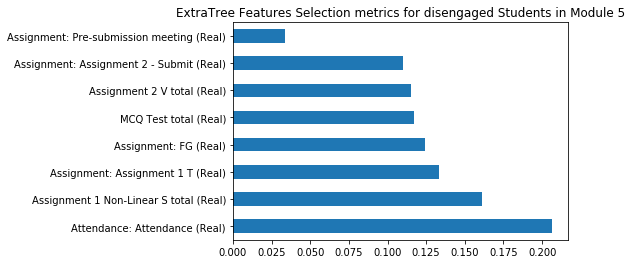

In [107]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X5ss,y5ss)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X5ss.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('ExtraTree Features Selection metrics for disengaged Students in Module 5')
plt.show()


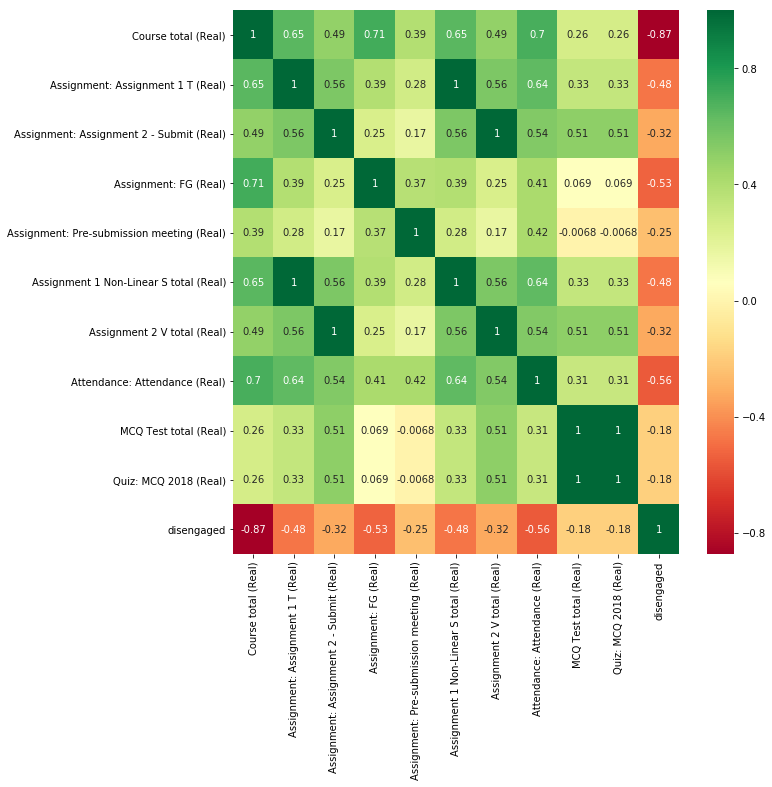

In [108]:
#get correlations of each features in dataset
corrmat = m5mg.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(m5mg[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [109]:
spear1 = m5mg['Attendance: Attendance (Real)']

In [110]:
spear2 = m5mg['disengaged']

In [111]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.59896016877211, pvalue=2.15174623615045e-07)


In [112]:
spear3 = m5mg['Assignment: FG (Real)']

In [113]:
spearcorr = stats.spearmanr(spear3,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.52695923636396924, pvalue=9.1294030066807446e-06)


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [114]:
m5mg_subset = m5mg

In [115]:
merge_subset5 = pd.merge(module5ml_onehot,m5mg_subset[['First name','disengaged']],on='First name', how='left')

In [116]:
merge_subset5.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Badge listing viewed,Event name_Comment created,...,Component_Folder,Component_Forum,Component_Online text submissions,Component_Overview report,Component_Page,Component_Submission comments,Component_System,Component_URL,Component_User report,disengaged
0,14:26,aI1T bxjW,2019-01-03,aI1T,bxjW,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14:26,aI1T bxjW,2019-01-03,aI1T,bxjW,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [117]:
X5s = merge_subset5.iloc[:,5:123]  #independent columns
y5s = merge_subset5.iloc[:,-1]    #target column i.e engaged


In [118]:
X5s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Badge listing viewed,Event name_Comment created,Event name_Comment deleted,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course user report viewed,...,Component_File submissions,Component_Folder,Component_Forum,Component_Online text submissions,Component_Overview report,Component_Page,Component_Submission comments,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [119]:
y5s.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [120]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X5s,y5s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X5s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                           Specs      Score
36            Event context_Assignment: v upload  38.101034
110                              Component_Forum  15.486591
83               Event context_Forum: News forum  12.625766
26   Event context_Assignment: Assignment 1    T  11.729773
22                   Event name_User list viewed   9.854485
7                Event name_Course module viewed   9.600609
11                  Event name_Discussion viewed   8.272923
13           Event name_Grade user report viewed   7.841655
117                        Component_User report   7.841655
108                   Component_File submissions   7.810321


[  8.81960743e-03   1.07271003e-02   1.32081475e-03   4.90730720e-03
   3.46544655e-03   1.39436120e-04   1.48251738e-02   2.55838743e-02
   3.07528793e-03   3.65018484e-04   7.79368163e-03   6.43166418e-03
   1.57532427e-03   1.48050960e-02   1.18002908e-03   2.89321910e-03
   6.56946929e-03   1.40558855e-02   1.43494504e-02   1.99457128e-02
   1.96582068e-02   1.66054964e-03   3.10169156e-02   7.05884289e-03
   6.95079647e-04   6.91113288e-03   5.02452920e-02   5.84769779e-03
   7.42728924e-03   1.38491391e-02   1.00528667e-02   4.01493771e-03
   3.14982557e-02   1.13990990e-02   1.00074297e-02   1.55601339e-02
   1.27726149e-01   1.17076021e-02   1.81900546e-04   8.47136150e-03
   3.27908295e-04   4.58352177e-03   9.98769719e-04   3.70122218e-03
   3.16807204e-04   1.55654998e-02   9.87705732e-04   6.87720921e-03
   5.90369809e-03   5.89804661e-03   3.20219068e-04   5.43274804e-03
   5.80061635e-03   1.21614978e-02   1.09661645e-04   1.00108418e-03
   5.01653042e-04   5.69864160e-03

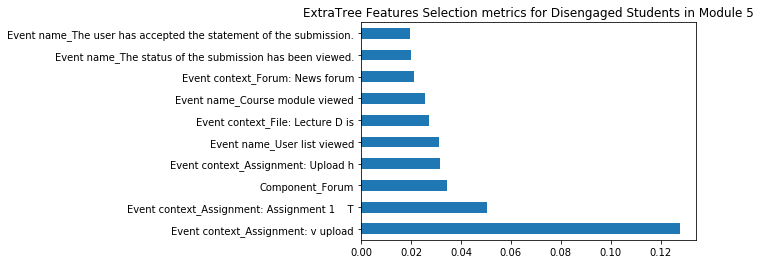

In [121]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X5s,y5s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X5s.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 5')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [122]:
#get correlations of each features in dataset
corrmat = merge_subset5.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset5[top_corr_features].corr(),annot=True,cmap="RdYlGn")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:
                                           Specs      Score
#36            Event context_Assignment: v upload  38.101034
#110                              Component_Forum  15.486591
#83               Event context_Forum: News forum  12.625766
#26   Event context_Assignment: Assignment 1    T  11.729773
#22                   Event name_User list viewed   9.854485
#7                Event name_Course module viewed   9.600609
#11                  Event name_Discussion viewed   8.272923
#13           Event name_Grade user report viewed   7.841655
#117                        Component_User report   7.841655
#108                   Component_File submissions   7.810321

In [123]:
featselect5 = X5s[['Event context_Assignment: v upload','Component_Forum','Event context_Forum: News forum','Event context_Assignment: Assignment 1    T','Event name_User list viewed','Event name_Course module viewed','Event name_Discussion viewed','Event name_Grade user report viewed','Component_User report','Component_File submissions']]

In [124]:
X5s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_An online text has been uploaded.',
       'Event name_Badge listing viewed', 'Event name_Comment created',
       'Event name_Comment deleted',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course user report viewed',
       ...
       'Component_File submissions', 'Component_Folder', 'Component_Forum',
       'Component_Online text submissions', 'Component_Overview report',
       'Component_Page', 'Component_Submission comments', 'Component_System',
       'Component_URL', 'Component_User report'],
      dtype='object', length=118)

In [125]:
Xfs5 = featselect5 # Features
yfs5 = y5s # Target variable


In [126]:
# Split dataset into training set and test set
Xfs5_train, Xfs5_test, yfs5_train, yfs5_test = train_test_split(Xfs5, yfs5, test_size=0.3, random_state=1) # 70% training and 30% test


In [127]:
# Create Decision Tree classifer object
dtclffs5 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs5 = dtclffs5.fit(Xfs5_train,yfs5_train)

#Predict the response for test dataset
yfs5_pred = dtclffs5.predict(Xfs5_test)


In [131]:
cvscores_10dt = cross_val_score(dtclffs5, Xfs5_train, yfs5_train, cv = 10)
print(np.mean(cvscores_10dt))

0.568528986109


In [133]:
# Instantiate the classifier
rfclffs5 = RandomForestClassifier(n_estimators =20)

# Fit to the training data
rfclffs5.fit(Xfs5_train, yfs5_train)

# Compute accuracy
print(rfclffs5.score(Xfs5_test, yfs5_test))


0.551940850277


In [49]:
cvscores_10rf = cross_val_score(rfclffs5, Xfs5_train, yfs5_train, cv = 10)
print(np.mean(cvscores_10rf))

0.568370758261


In [50]:
from sklearn.svm import SVC

svcfs5 = SVC()

#Train it, or "fit it", to the data:
svcfs5.fit(Xfs5_train, yfs5_train)

# Compute accuracy
print(svcfs5.score(Xfs5_test, yfs5_test))


0.551940850277


In [52]:
cvscores_10svc = cross_val_score(svcfs5, Xfs5_train, yfs5_train, cv = 10)
print(np.mean(cvscores_10svc))

0.568528986109


In [53]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs5 = LogisticRegression()

# fit the model with data
logregfs5.fit(Xfs5_train,yfs5_train)

#
ylg5_pred=logregfs5.predict(Xfs5_test)


In [54]:
cvscores_10 = cross_val_score(logregfs5, Xfs5_train, yfs5_train, cv = 10)
print(np.mean(cvscores_10))

0.568528986109


In [55]:
# import the metrics class
from sklearn import metrics
cnflr5_matrix = metrics.confusion_matrix(yfs5_test, ylg5_pred)
cnflr5_matrix


array([[ 101, 1135],
       [  77, 1392]], dtype=int64)

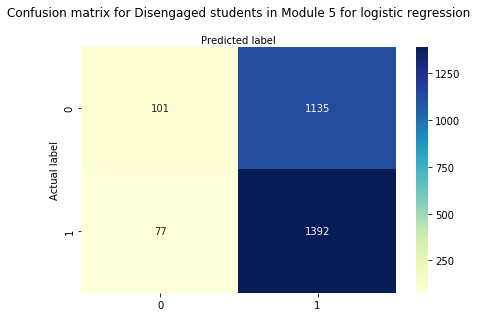

In [102]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr5_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Disengaged students in Module 5 for logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


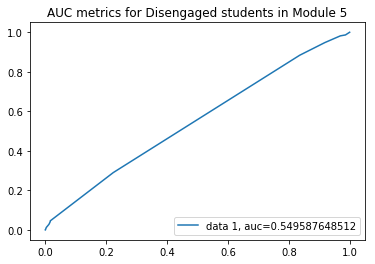

In [101]:
ylg5_pred_proba = logregfs5.predict_proba(Xfs5_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs5_test,  ylg5_pred_proba)
auc = metrics.roc_auc_score(yfs5_test, ylg5_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 5')

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.54. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


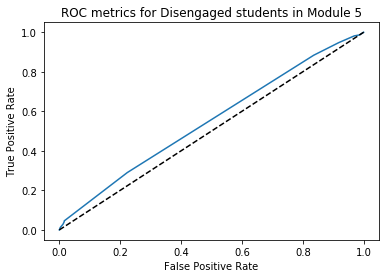

In [100]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs5_test, ylg5_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 5')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [59]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs5_test, yfs5_pred))


Accuracy: 0.551940850277


In [60]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs5_test, yfs5_pred))


0.550850811239


In [61]:
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs5_test, yfs5_pred))


0.947583390061


In [62]:
print("Accuracy:",metrics.accuracy_score(yfs5_test, yfs5_pred))
print("Precision:",metrics.precision_score(yfs5_test, yfs5_pred))
print("Recall:",metrics.recall_score(yfs5_test, yfs5_pred))
print("F1 Score",metrics.f1_score(yfs5_test, yfs5_pred))


Accuracy: 0.551940850277
Precision: 0.550850811239
Recall: 0.947583390061
F1 Score 0.696696696697


In [63]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs5_test, yfs5_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs5_test, yfs5_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs5_test, yfs5_pred)))

Mean Absolute Error: 0.448059149723
Mean Squared Error: 0.448059149723
Root Mean Squared Error: 0.669372205669


In [108]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs5_test, ylg5_pred))
print(classification_report(yfs5_test, ylg5_pred))


[[ 101 1135]
 [  77 1392]]
             precision    recall  f1-score   support

          0       0.57      0.08      0.14      1236
          1       0.55      0.95      0.70      1469

avg / total       0.56      0.55      0.44      2705



In [ ]:
#Trimester 1

In [135]:
FirstFive5.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address,Date
1737,23:36,aTka b80f,-,Course: Module 5,System,Course viewed,The user with id '0' viewed the course with id...,web,127.0.0.1,2018-10-12
1738,23:20,a3xG bp9L,-,File: Assets for Getting Started,File,Course module viewed,The user with id '0' viewed the 'resource' act...,web,127.0.0.1,2018-10-12


In [136]:
FirstFive5= FirstFive5.drop(FirstFive5[['IP address','Origin','Description','Affected user']], axis=1)


In [137]:
FirstFive5.head(2)

,Time,User full name,Event context,Component,Event name,Date
1737,23:36,aTka b80f,Course: Module 5,System,Course viewed,2018-10-12
1738,23:20,a3xG bp9L,File: Assets for Getting Started,File,Course module viewed,2018-10-12


In [138]:
FirstFive5_onehot = FirstFive5.copy()
FirstFive5_onehot = pd.get_dummies(FirstFive5_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive5_onehot = pd.get_dummies(FirstFive5_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive5_onehot = pd.get_dummies(FirstFive5_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive5_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



        Time User full name       Date  Event name_A file has been uploaded.  \
1737   23:36      aTka b80f 2018-10-12                                     0   
1738   23:20      a3xG bp9L 2018-10-12                                     0   
1739   23:19      a3xG bp9L 2018-10-12                                     0   
1740   23:19      a3xG bp9L 2018-10-12                                     0   
1741   23:08      aTka b80f 2018-10-12                                     0   

      Event name_A submission has been submitted.  \
1737                                            0   
1738                                            0   
1739                                            0   
1740                                            0   
1741                                            0   

      Event name_An online text has been uploaded.  \
1737                                             0   
1738                                             0   
1739                                  

In [139]:
FirstFive5_onehot.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Folder,Component_Forum,Component_Online text submissions,Component_Page,Component_System,Component_URL,Component_User report
1737,23:36,aTka b80f,2018-10-12,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1738,23:20,a3xG bp9L,2018-10-12,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [140]:
# new data frame with split value columns 
new5a = FirstFive5_onehot["User full name"].str.split(" ", n = 1, expand = True)


In [141]:
# making separate first name column from new data frame 
FirstFive5_onehot["First name"]= new5a[0] 

# making separate last name column from new data frame 
FirstFive5_onehot["Last name"]= new5a[1] 


In [142]:
# Merge subset
merge_subset5_tri = pd.merge(FirstFive5_onehot,m5mg_subset[['First name','disengaged']],on='First name', how='left')

In [143]:
merge_subset5_tri.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course viewed,...,Component_Folder,Component_Forum,Component_Online text submissions,Component_Page,Component_System,Component_URL,Component_User report,First name,Last name,disengaged
0,23:36,aTka b80f,2018-10-12,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,aTka,b80f,1
1,23:20,a3xG bp9L,2018-10-12,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,a3xG,bp9L,1


In [144]:
X55s = merge_subset5_tri.iloc[:,3:91]  #independent columns
y55s = merge_subset5_tri.iloc[:,-1]    #target column i.e engaged


In [145]:
X55s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_An online text has been uploaded.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course searched,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade user report viewed,Event name_Group member added,...,Component_Assignment,Component_File,Component_File submissions,Component_Folder,Component_Forum,Component_Online text submissions,Component_Page,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [146]:
y55s.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [147]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X55s,y55s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X55s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                                Specs     Score
21  Event context_Assignment: Assignment 1 i of po...  9.382588
36           Event context_File: Additional Resources  8.394659
49                      Event context_File: Lecture h  8.007055
73                     Event context_URL: au download  7.032445
27             Event context_Assignment: is of Task 3  6.166537
48                   Event context_File: Lecture D is  6.001101
23    Event context_Assignment: Assignment 2 - Submit  4.181494
45                    Event context_File: Lecture  ao  2.817910
3       Event name_Course module instance list viewed  2.742362
13                     Event name_Submission updated.  2.189184


[ 0.00219341  0.00806919  0.00037506  0.02291585  0.00261391  0.00215194
  0.00085468  0.00184219  0.00225474  0.00062699  0.00030823  0.00212114
  0.02551888  0.0158289   0.02108276  0.00819524  0.0003072   0.01154204
  0.00158348  0.00405617  0.00067608  0.07696708  0.00267339  0.04280226
  0.01396573  0.0264978   0.00116205  0.05230967  0.02016655  0.00866978
  0.01834733  0.00569522  0.00933331  0.00979078  0.00221139  0.00167863
  0.08012655  0.00569154  0.00198391  0.00096958  0.00500897  0.0132318
  0.01020684  0.0003083   0.0049705   0.02524791  0.01072588  0.00434826
  0.05626381  0.07689138  0.00563797  0.01319251  0.01099031  0.01009728
  0.00790565  0.00578985  0.01394545  0.00035851  0.0143594   0.00082121
  0.01047802  0.00082034  0.00132139  0.00184313  0.00199907  0.00075279
  0.00027812  0.00179729  0.00235114  0.00035649  0.01372945  0.02023277
  0.00679168  0.06763686  0.01340626  0.00563457  0.00050419  0.00107581
  0.00692053  0.01200881  0.00718601  0.00318561  0.

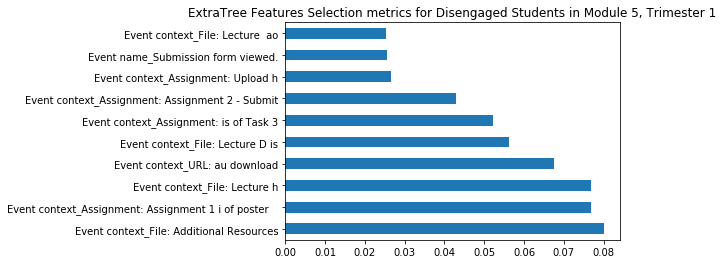

In [148]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X55s,y55s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X55s.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 5, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


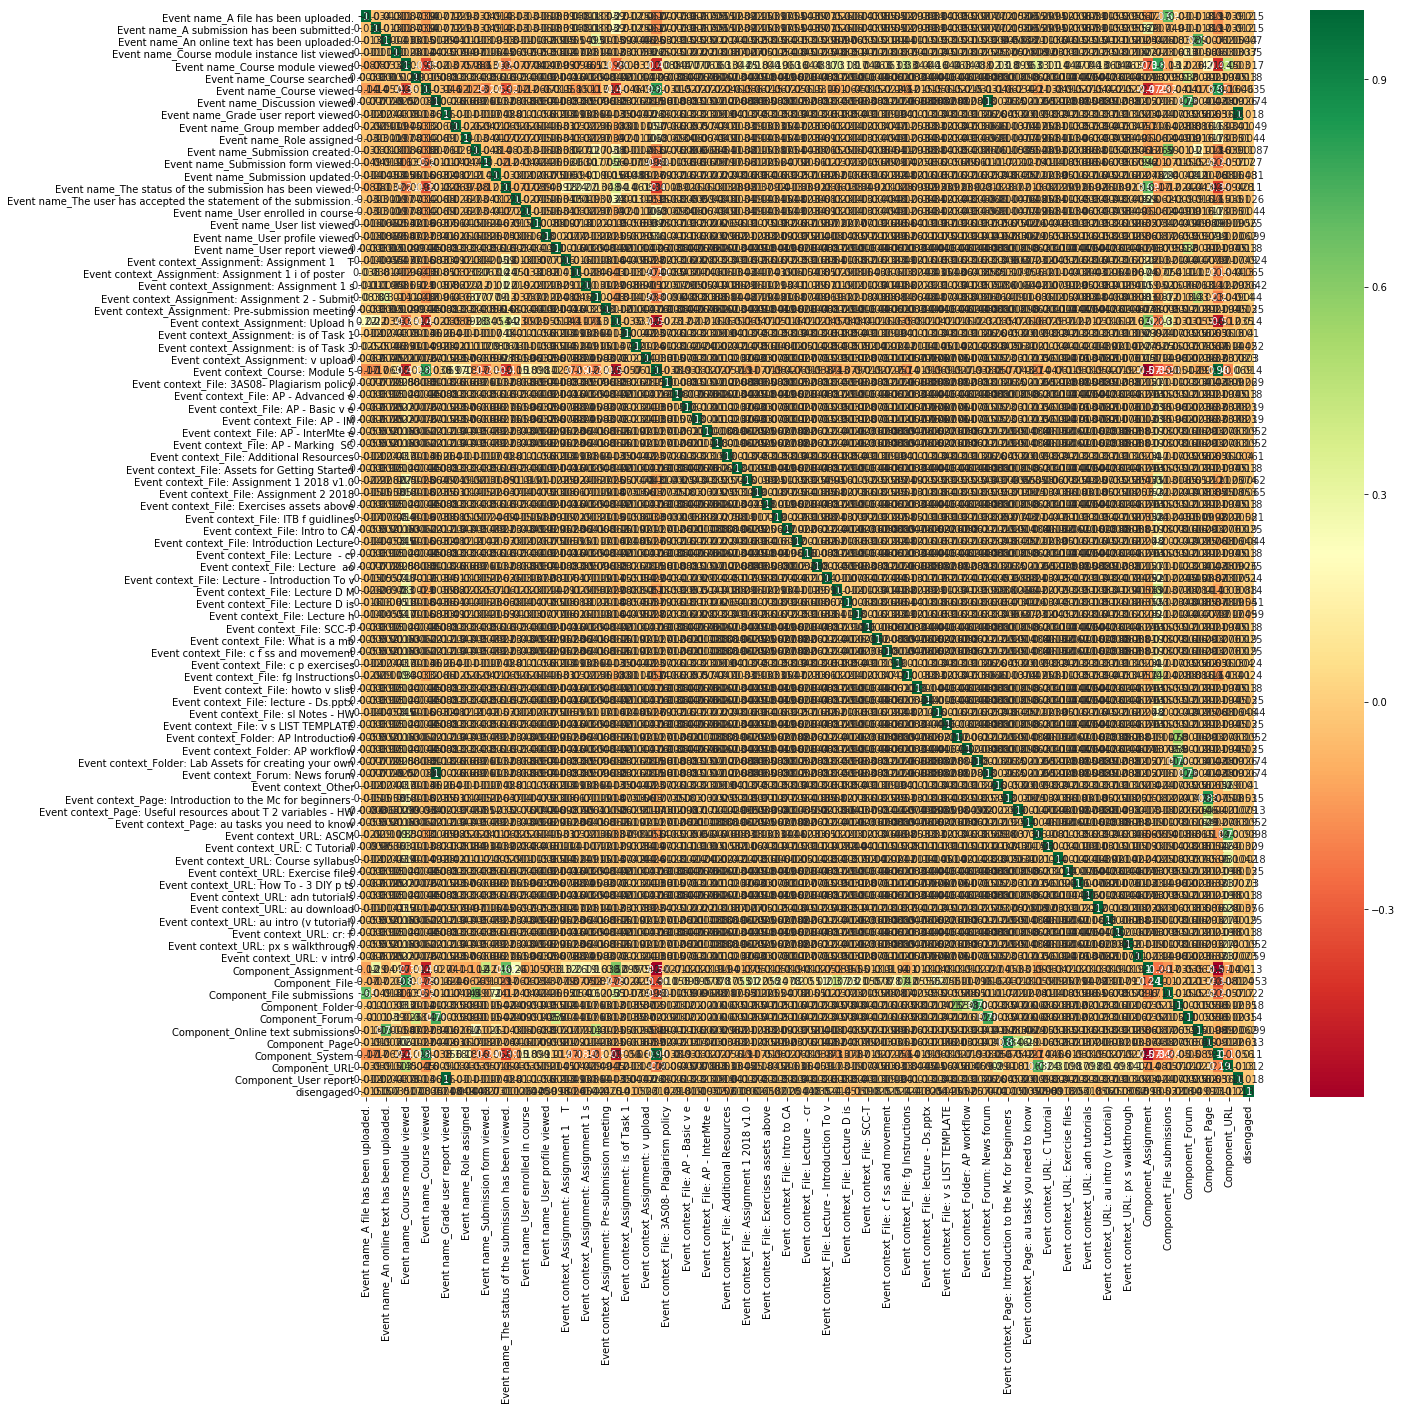

In [149]:
#get correlations of each features in dataset
corrmat = merge_subset5_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset5_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [150]:
X55s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_An online text has been uploaded.',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course viewed', 'Event name_Discussion viewed',
       'Event name_Grade user report viewed', 'Event name_Group member added',
       'Event name_Role assigned', 'Event name_Submission created.',
       'Event name_Submission form viewed.', 'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User list viewed',
       'Event name_User profile viewed', 'Event name_User report viewed',
       'Event context_Assignment: Assignment 1    T',
       'Event context_Assignment: Assignment 1 i of poster   ',
       'Eve

In [151]:
feattime55 = X55s[['Event context_Assignment: Assignment 1 i of poster   ','Event context_File: Additional Resources','Event context_File: Lecture h','Event context_URL: au download','Event context_Assignment: is of Task 3','Event context_File: Lecture D is','Event context_Assignment: Assignment 2 - Submit','Event context_File: Lecture  ao','Event name_Course module instance list viewed','Event name_Submission updated.']]

In [152]:
Xt5a = feattime55 # Features
yt5a = y55s # Target variable

In [153]:
# Create training and testing sets
Xt5a_train, Xt5a_test, yt5a_train, yt5a_test = train_test_split(Xt5a, yt5a, test_size=0.3)


In [154]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt5a = LogisticRegression()

# fit the model with data
logregt5a.fit(Xt5a_train,yt5a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
yt5a_pred=logregt5a.predict(Xt5a_test)

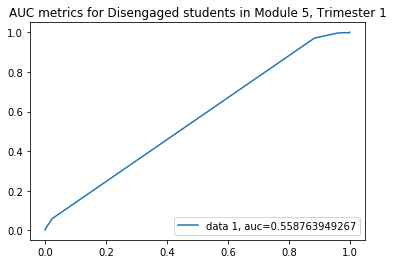

In [156]:
ylg5a_pred_proba = logregt5a.predict_proba(Xt5a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt5a_test,  ylg5a_pred_proba)
auc = metrics.roc_auc_score(yt5a_test, ylg5a_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 5, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.56. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


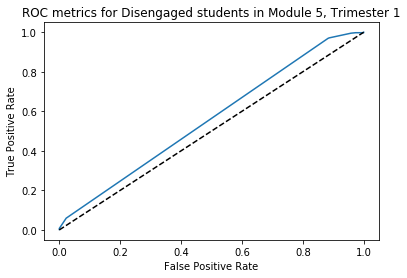

In [157]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt5a_test, ylg5a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 5, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [158]:
# Perform 10-fold CV
cvscores_5a = cross_val_score(logregt5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_5a))

0.588868670886


In [159]:
print("Accuracy:",metrics.accuracy_score(yt5a_test, yt5a_pred))
print("Precision:",metrics.precision_score(yt5a_test, yt5a_pred))
print("Recall:",metrics.recall_score(yt5a_test, yt5a_pred))
print("F1 Score",metrics.f1_score(yt5a_test, yt5a_pred))


Accuracy: 0.639941690962
Precision: 0.635093167702
Recall: 0.971496437055
F1 Score 0.768075117371


In [162]:
# Instantiate the classifier
rfclffs5a = RandomForestClassifier(n_estimators =20)

# Fit to the training data
rfclffs5a.fit(Xt5a_train, yt5a_train)

# Compute accuracy
print(rfclffs5a.score(Xt5a_test, yt5a_test))


0.639941690962


In [91]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.608886113715


In [92]:
from sklearn.svm import SVC

svcfs5a = SVC()

#Train it, or "fit it", to the data:
svcfs5a.fit(Xt5a_train, yt5a_train)

# Compute accuracy
print(svcfs5a.score(Xt5a_test, yt5a_test))


0.562682215743


In [93]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.599479618344


In [94]:
# Create Decision Tree classifer object
dtclffs5a = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs5a = dtclffs5a.fit(Xt5a_train,yt5a_train)

#Predict the response for test dataset
yfs5a_pred = dtclffs5a.predict(Xt5a_test)


In [95]:
# Perform 10-fold CV
cvscores_10dt5a = cross_val_score(dtclffs5a, Xt5a_train, yt5a_train, cv = 10)
print(np.mean(cvscores_10dt5a))

0.608882182898


In [96]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt5a_test, yt5a_pred))
print(classification_report(yt5a_test, yt5a_pred))


[[ 17 284]
 [  5 380]]
             precision    recall  f1-score   support

          0       0.77      0.06      0.11       301
          1       0.57      0.99      0.72       385

avg / total       0.66      0.58      0.45       686



In [104]:
disengaged5.sum()

39

In [105]:
chi = stats.chisquare(disengaged5)
print(chi)

Power_divergenceResult(statistic=23.999999999999996, pvalue=0.99999662835226588)


In [107]:
# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between engaged is statistically significant")
else:
    print("No significant difference between disengaged found")

No significant difference between disengaged found


In [66]:
Powerfeatselect5 = merge_subset5[['Event context_Assignment: v upload','Component_Forum','Event context_Forum: News forum','Event context_Assignment: Assignment 1    T','Event name_User list viewed','Event name_Course module viewed','Event name_Discussion viewed','Event name_Grade user report viewed','Component_User report','Component_File submissions','disengaged']]

In [67]:
Powerfeatselect5.groupby(['disengaged']).mean()

,Event context_Assignment: v upload,Component_Forum,Event context_Forum: News forum,Event context_Assignment: Assignment 1 T,Event name_User list viewed,Event name_Course module viewed,Event name_Discussion viewed,Event name_Grade user report viewed,Component_User report,Component_File submissions
disengaged,,,,,,,,,,
0,0.062949,0.004957,0.004957,0.006691,0.002478,0.211152,0.004709,0.017596,0.017596,0.095663
1,0.034531,0.013050,0.012046,0.014254,0.007227,0.242522,0.010038,0.010640,0.010640,0.078298


In [68]:
spear4 = Powerfeatselect5['Event context_Assignment: v upload']

In [69]:
spear5 = Powerfeatselect5['disengaged']

In [70]:
spearcorr = stats.spearmanr(spear4,spear5)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.066599627605477815, pvalue=2.4522375897937814e-10)
